## CS109a Project - Lending Club

**Harvard University**<br/>
**Fall 2018**<br/>

Creators: Tim  Maounis and Dylan de Waart

In [160]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

Import libraries:

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import datetime

import seaborn as sns

<hr style='height:2pt'>
<div class='theme'> Data Cleaning </div> 

Import data

In [257]:
PATH_RAW = "../data/data_raw/"
#Only use 2018 Q3 for now...
df_a_raw = pd.read_csv(PATH_RAW+"accepted/A_2018_Q3.csv") #accepted dataframe
df_d_raw = pd.read_csv(PATH_RAW+"declined/D_2018_Q3.csv") #declined dataframe

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [258]:
df_a_old_raw = pd.read_csv(PATH_RAW+"accepted/A_2007-2011.csv") #accepted dataframe 2007-11

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [291]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display (df_a_raw)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000.0,30000.0,30000.0,36 months,8.46%,946.48,A,A5,Mental Health Therapist,5 years,MORTGAGE,70000.0,Source Verified,Sep-2018,Issued,n,NaN,NaN,medical,Medical expenses,562xx,MN,37.12,0.0,Sep-2002,0.0,NaN,NaN,9.0,0.0,8475.0,40%,57.0,w,30000.00,30000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Oct-2018,Oct-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,256717.0,2.0,4.0,2.0,3.0,3.0,114898.0,73.0,0.0,0.0,3674.0,65.0,21200.0,1.0,0.0,4.0,3.0,32090.0,6526.0,36.0,0.0,0.0,192.0,184.0,40.0,3.0,2.0,148.0,NaN,3.0,NaN,0.0,1.0,2.0,1.0,4.0,44.0,3.0,11.0,2.0,9.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,298892.0,123373.0,10200.0,133192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,7.84%,312.63,A,A4,NaN,NaN,OWN,50000.0,Verified,Sep-2018,Issued,n,NaN,NaN,credit_card,Credit card refinancing,629xx,IL,9.00,1.0,May-2002,0.0,5.0,NaN,13.0,0.0,8542.0,26.6%,19.0,w,10000.00,10000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,Oct-2018,Oct-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,8883.0,0.0,1.0,0.0,0.0,33.0,341.0,14.0,1.0,2.0,1655.0,26.0,32100.0,0.0,0.0,0.0,2.0,683.0,8920.0,28.1,0.0,0.0,196.0,146.0,11.0,11.0,1.0,17.0,NaN,NaN,NaN,0.0,3.0,6.0,6.0,9.0,2.0,12.0,16.0,6.0,13.0,0.0,0.0,0.0,1.0,94.7,33.3,0.0,0.0,34500.0,8883.0,12400.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4200.0,4200.0,4200.0,36 months,13.56%,142.66,C,C1,Database Marketing Coordinator,< 1 year,MORTGAGE,38500.0,Source Verified,Sep-2018,Issued,n,NaN,NaN,vacation,Vacation,395xx,MS,30.34,1.0,J

In [10]:
def print_row(df, row):
    for ctr,i in enumerate(df.iloc[row]):
        print (str(df.columns[ctr])+": "+str(i))

In [11]:
print_row(df_a_raw, 0)

id: nan
member_id: nan
loan_amnt: 30000.0
funded_amnt: 30000.0
funded_amnt_inv: 30000.0
term:  36 months
int_rate:   8.46%
installment: 946.48
grade: A
sub_grade: A5
emp_title: Mental Health Therapist
emp_length: 5 years
home_ownership: MORTGAGE
annual_inc: 70000.0
verification_status: Source Verified
issue_d: Sep-2018
loan_status: Issued
pymnt_plan: n
url: nan
desc: nan
purpose: medical
title: Medical expenses
zip_code: 562xx
addr_state: MN
dti: 37.12
delinq_2yrs: 0.0
earliest_cr_line: Sep-2002
inq_last_6mths: 0.0
mths_since_last_delinq: nan
mths_since_last_record: nan
open_acc: 9.0
pub_rec: 0.0
revol_bal: 8475.0
revol_util: 40%
total_acc: 57.0
initial_list_status: w
out_prncp: 30000.0
out_prncp_inv: 30000.0
total_pymnt: 0.0
total_pymnt_inv: 0.0
total_rec_prncp: 0.0
total_rec_int: 0.0
total_rec_late_fee: 0.0
recoveries: 0.0
collection_recovery_fee: 0.0
last_pymnt_d: nan
last_pymnt_amnt: 0.0
next_pymnt_d: Oct-2018
last_credit_pull_d: Oct-2018
collections_12_mths_ex_med: 0.0
mths_since_

In [24]:
df_a_raw.shape

(128196, 145)

In [25]:
df_d_raw.shape

(2585245, 9)

In [47]:
df_d_raw.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,3000.0,2018-07-01,Debt consolidation,NaN,100%,925xx,CA,< 1 year,0
1,40000.0,2018-07-01,Major purchase,NaN,7.45%,335xx,FL,< 1 year,0
2,16000.0,2018-07-01,Debt consolidation,NaN,34.93%,156xx,PA,< 1 year,0
3,40000.0,2018-07-01,Debt consolidation,NaN,27.87%,957xx,CA,< 1 year,0
4,300000.0,2018-07-01,Business Loan,NaN,-1%,258xx,TN,< 1 year,0


In [42]:
def stats_NAN(df):
    df_stats = pd.DataFrame(index=[df.columns], columns=["NaN Ratio"])
    for col in df.columns:
        df_stats["NaN Ratio"][col] = df[col].isna().sum()/len(df) #NaN ratio
    return df_stats

In [43]:
nan_stats_a = stats_NAN(df_a_raw)
display(nan_stats_a)

,NaN Ratio
id,0.999984
member_id,1
loan_amnt,1.56011e-05
funded_amnt,1.56011e-05
funded_amnt_inv,1.56011e-05
term,1.56011e-05
int_rate,1.56011e-05
installment,1.56011e-05
grade,1.56011e-05
sub_grade,1.56011e-05


In [15]:
nan_stats_d = stats_NAN(df_d_raw)
display(nan_stats_d)

,NaN Ratio
Amount Requested,0
Application Date,0
Loan Title,0
Risk_Score,0.971057
Debt-To-Income Ratio,0
Zip Code,0
State,0
Employment Length,0.0402619
Policy Code,0


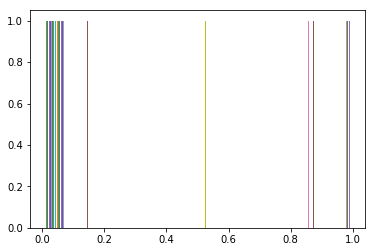

In [14]:
plt.hist(nan_stats_a);

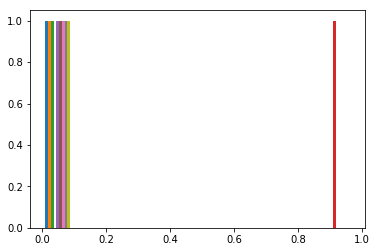

In [15]:
plt.hist(nan_stats_d);

In [44]:
def drop_NAN_cols(df, thresh, labels):
    df_copy = df.copy()
    count = 0
    for col in labels:
        ratio = df[col].isna().sum()/len(df) #NaN ratio
        if ratio >= threshold:
            df_copy = df_copy.drop(labels=[col])
            count+=1
    print(str(count)+ " features dropped")
    return df_copy

In [217]:
df_a_raw[["num_accts_ever_120_pd", "delinq_2yrs", "delinq_amnt"]].describe()

,num_accts_ever_120_pd,delinq_2yrs,delinq_amnt
count,128194.000000,128194.000000,128194.000000
mean,0.472846,0.229207,1.355266
std,1.389400,0.760923,181.795101
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,58.000000,58.000000,44925.000000


In [190]:
def nan_to_zero(df, labels):
    df_copy = df.copy(deep=True)
    for col in labels:
        df_copy[col].fillna(0, inplace=True)
    return df_copy

In [124]:
df_copy = df_a_raw.copy()
a = df_copy["num_accts_ever_120_pd"].fillna(0, inplace=True)

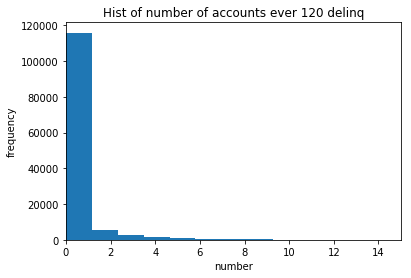

In [87]:
plt.hist(df_a_raw["num_accts_ever_120_pd"].fillna(0), bins=50)
plt.title("Hist of number of accounts ever 120 delinq")
plt.xlabel("number")
plt.xlim(0,15)
plt.ylabel("frequency");

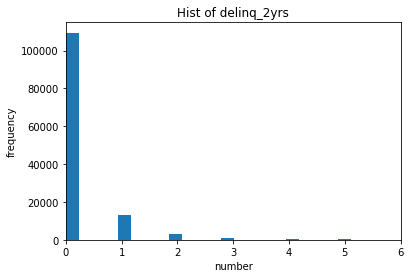

In [60]:
plt.hist(df_a_raw["delinq_2yrs"].fillna(0), bins=250)
plt.title("Hist of delinq_2yrs")
plt.xlabel("number")
plt.xlim(0,6)
plt.ylabel("frequency");

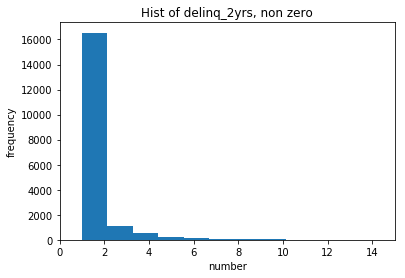

In [57]:
df_a_delinq2yrs = df_a_raw["delinq_2yrs"].fillna(0)
df_a_delinq2yrs = df_a_delinq2yrs[df_a_delinq2yrs!=0]
plt.hist(df_a_delinq2yrs, bins=50)
plt.title("Hist of delinq_2yrs, non zero")
plt.xlabel("number")
plt.xlim(0,15)
plt.ylabel("frequency");

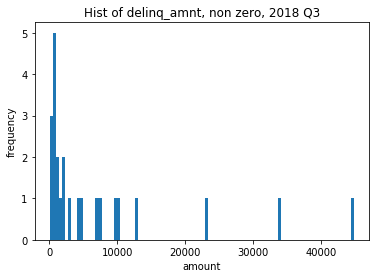

In [47]:
df_a_delinq0 = df_a_raw["delinq_amnt"].fillna(0)
df_a_delinq0 = df_a_delinq0[df_a_delinq0!=0]
plt.hist(df_a_delinq0, bins=100)
plt.title("Hist of delinq_amnt, non zero, 2018 Q3")
plt.xlabel("amount")
plt.ylabel("frequency");

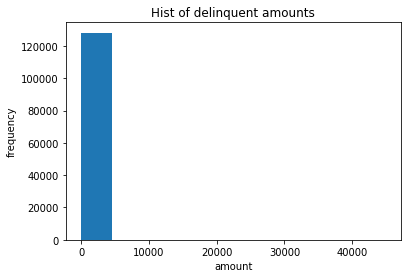

In [52]:
plt.hist(df_a_raw["delinq_amnt"].fillna(0))
plt.title("Hist of delinq_amnt")
plt.xlabel("amount")
plt.ylabel("frequency");

In [259]:
def convert_date(df, label, frmt):
    df_copy = df.copy()
    df_copy[label] = pd.to_datetime(df_copy[label], format=frmt)
    return df_copy

In [260]:
def convert_intr(df, label):
    df_copy = df.copy()
    df_copy[label] = df_copy[label].str.rstrip('%').astype('float') / 100.0
    return df_copy

In [261]:
df_old_date = convert_date(df_a_old_raw, "issue_d", "%b-%Y")

In [262]:
df_old_date = convert_intr(df_old_date, "int_rate")

In [263]:
df_old_A=df_old_date[df_old_date["grade"]=="A"].sort_values(by="issue_d")
df_old_B=df_old_date[df_old_date["grade"]=="B"].sort_values(by="issue_d")
df_old_C=df_old_date[df_old_date["grade"]=="C"].sort_values(by="issue_d")
df_old_D=df_old_date[df_old_date["grade"]=="D"].sort_values(by="issue_d")
df_old_E=df_old_date[df_old_date["grade"]=="E"].sort_values(by="issue_d")
df_old_F=df_old_date[df_old_date["grade"]=="F"].sort_values(by="issue_d")
df_old_G=df_old_date[df_old_date["grade"]=="G"].sort_values(by="issue_d")

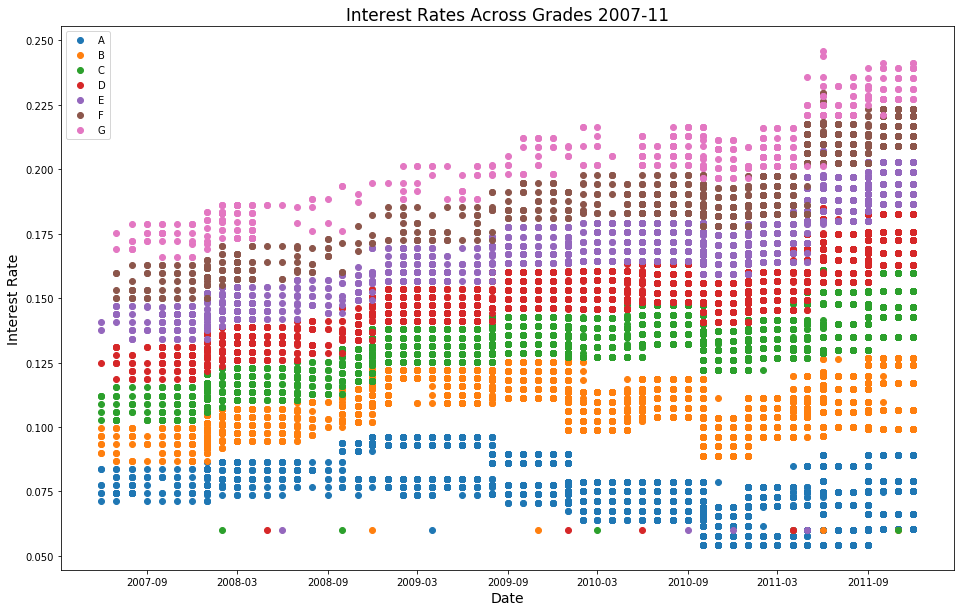

In [264]:
plt.figure(figsize=(16,10))
plt.title("Interest Rates Across Grades 2007-11", fontsize=17)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Interest Rate", fontsize=14)
plt.plot_date(x=df_old_A["issue_d"].dropna(),y=df_old_A["int_rate"].dropna(), label="A")
plt.plot_date(x=df_old_B["issue_d"].dropna(),y=df_old_B["int_rate"].dropna(), label="B")
plt.plot_date(x=df_old_C["issue_d"].dropna(),y=df_old_C["int_rate"].dropna(), label="C")
plt.plot_date(x=df_old_D["issue_d"].dropna(),y=df_old_D["int_rate"].dropna(), label="D")
plt.plot_date(x=df_old_E["issue_d"].dropna(),y=df_old_E["int_rate"].dropna(), label="E")
plt.plot_date(x=df_old_F["issue_d"].dropna(),y=df_old_F["int_rate"].dropna(), label="F")
plt.plot_date(x=df_old_G["issue_d"].dropna(),y=df_old_G["int_rate"].dropna(), label="G")
plt.legend();

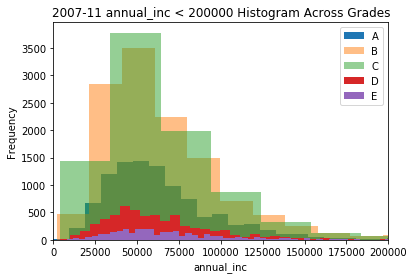

In [265]:
#grade income hist
plt.hist(x=df_old_A["annual_inc"].fillna(0), bins=200, label="A", stacked=True)
plt.hist(x=df_old_B["annual_inc"].fillna(0), bins=200, label="B", stacked=True, alpha=0.5)
plt.hist(x=df_old_C["annual_inc"].fillna(0), bins=200, label="C", stacked=True, alpha=0.5)
plt.hist(x=df_old_D["annual_inc"].fillna(0), bins=200, label="D", stacked=True)
plt.hist(x=df_old_E["annual_inc"].fillna(0), bins=200, label="E", stacked=True)
plt.xlim(0,200000)
plt.xlabel("annual_inc")
plt.ylabel("Frequency")
plt.title("2007-11 annual_inc < 200000 Histogram Across Grades")
plt.legend();

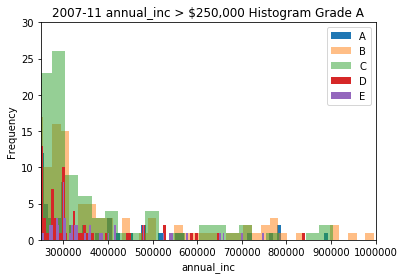

In [266]:
plt.hist(x=df_old_A["annual_inc"].fillna(0), bins=200, label="A", stacked=True)
plt.hist(x=df_old_B["annual_inc"].fillna(0), bins=200, label="B", stacked=True, alpha=0.5)
plt.hist(x=df_old_C["annual_inc"].fillna(0), bins=200, label="C", stacked=True, alpha=0.5)
plt.hist(x=df_old_D["annual_inc"].fillna(0), bins=200, label="D", stacked=True)
plt.hist(x=df_old_E["annual_inc"].fillna(0), bins=200, label="E", stacked=True)
plt.xlim(250000,1000000)
plt.ylim(0,30)
plt.title("2007-11 annual_inc > $250,000 Histogram Grade A")
plt.xlabel("annual_inc")
plt.ylabel("Frequency")
plt.legend()

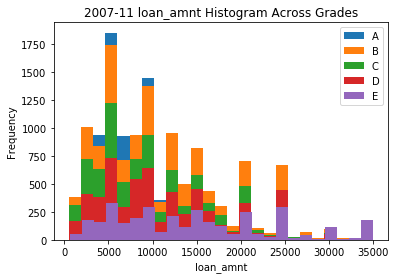

In [267]:
#grade loan_amount hist
bins=25
plt.hist(x=df_old_A["loan_amnt"].fillna(0), bins=bins, label="A")
plt.hist(x=df_old_B["loan_amnt"].fillna(0), bins=bins, label="B")
plt.hist(x=df_old_C["loan_amnt"].fillna(0), bins=bins, label="C")
plt.hist(x=df_old_D["loan_amnt"].fillna(0), bins=bins, label="D")
plt.hist(x=df_old_E["loan_amnt"].fillna(0), bins=bins, label="E")
plt.xlabel("loan_amnt")
plt.ylabel("Frequency")
plt.title("2007-11 loan_amnt Histogram Across Grades")
plt.legend();

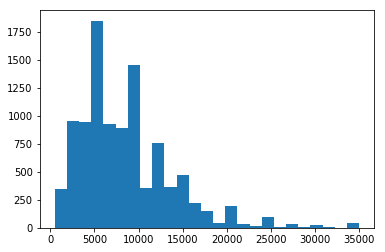

In [173]:
plt.hist(x=df_old_A["loan_amnt"].fillna(0), bins=bins, label="A");

In [199]:
def convert_dti(df, label):
    df[label] = df[label]/100
    return df

In [200]:
df_old_date = convert_dti(df_old_date, "dti")

In [268]:
def convert_percent(df, label):
    df_copy = df.copy()
    df_copy[label] = df_copy[label].str.rstrip('%').astype('float') / 100.0
    return df_copy

In [269]:
df_old_date = convert_percent(df_old_date, "revol_util")

In [270]:
df_old_hodum = pd.get_dummies(df_old_date, columns=["home_ownership"])

In [271]:
df_old_hodum.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


In [205]:
pair_ftrs = ["delinq_2yrs","delinq_amnt","loan_amnt","int_rate","grade","sub_grade",
             "annual_inc", "dti", "revol_bal","revol_util", "total_acc", 
             "pub_rec_bankruptcies", "tax_liens",
            "home_ownership_MORTGAGE", "home_ownership_NONE", "home_ownership_OTHER",
            "home_ownership_OWN", "home_ownership_RENT"]

In [206]:
df_old_hodum.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object', length=149)

In [284]:
def convert_grade(grade):
    if grade != None or not math.isnan(grade):
        print(grade)
        letter = grade[0]
        num = int(grade[1])
        num_grade = {
            'A':0,
            'B':1,
            'C':2,
            'D':3,
            'E':4,
            'F':5,
            'G':6
        }.get(letter)
        num_grade += (num-1)*0.2
        return num_grade
    else:
        return 5

In [285]:
stats_NAN(df_old_hodum[['sub_grade','grade']])

,NaN Ratio
sub_grade,7.05252e-05
grade,7.05252e-05


In [286]:
df_old_hodum.dropna(subset=['grade','sub_grade'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,NaN,NaN,5000.0,5000.0,4975.000000,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
1,NaN,NaN,2500.0,2500.0,2500.000000,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
2,NaN,NaN,2400.0,2400.0,2400.000000,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
3,NaN,NaN,10000.0,10000.0,10000.000000,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
4,NaN,NaN,3000.0,3000.0,3000.000000,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
5,NaN,NaN,5000.0,5000.0,5000.000000,36 months,0.0790,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
6,NaN,NaN,7000.0,7000.0,7000.000000,60 months,0.1596,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
7,NaN,NaN,3000.0,3000.0,3000.000000,36 months,0.1864,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
8,NaN,NaN,5600.0,5600.0,5600.000000,60 months,0.2128,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0
9,NaN,NaN,5375.0,5375.0,5350.000000,60 months,0.1269,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


In [287]:
df_old_hodum['num_grade'] = df_old_hodum['sub_grade'].apply(convert_grade)

B2
C4
C5
C1
B5
A4
C5
E1
F2
B5
C3
B5
C1
B1
B2
D1
C4
A1
B3
A1
C4
B4
B3
B3
B3
B1
C2
D2
B3
B3
A3
A4
C5
A5
C5
B2
B1
A4
B4
B5
A3
A4
D5
D2
A1
B1
A5
B2
A1
A2
B1
B1
B2
C5
B1
E4
E4
B4
B2
D2
B5
D3
C3
D2
B2
B2
D3
C2
F2
C3
D4
D2
C1
D2
A5
C3
C1
F3
A4
E4
D3
C2
B5
A1
B5
B4
D3
B2
D1
C1
B2
B2
E3
B5
B3
F4
B3
D3
A1
B5
B1
D4
A5
B1
A5
D2
B2
C1
C1
B4
A2
A2
F1
B5
D5
B3
A5
B3
A4
B1
C1
B2
B1
B4
E4
A4
C2
E5
A5
A3
B5
C5
A3
C3
A2
A3
B3
A2
B5
A1
E1
B3
C2
A3
B1
B1
E4
E3
B2
D2
C1
B3
D1
C1
B4
C3
C2
A1
B1
B4
C4
D3
B1
A2
C3
B1
C2
B1
A3
B1
B4
C1
C1
B5
B4
C1
D3
F1
B4
B3
B2
B4
D2
D3
C1
B2
B2
C4
B5
B5
B5
B2
D2
D4
A2
C2
B3
B5
B2
C1
C3
B2
C4
B4
D1
B1
A5
C4
B4
E5
C4
C1
C2
C4
A2
B4
C2
D3
D3
B4
B5
C1
C1
G4
A4
D2
B3
A3
D3
B4
B3
B5
A2
B4
A4
A2
A5
F3
C3
B5
B4
B4
D4
C1
B1
B4
A4
B1
B5
D3
E2
B5
A1
A4
B3
B4
A3
B3
B3
A5
B4
C1
C1
C1
A4
B5
A5
B3
E1
A4
C1
B1
A4
B5
A1
A2
A5
A5
A4
B4
C5
A1
A3
B4
A4
C4
C4
B3
B1
B1
A5
D3
B3
B1
B2
A3
B3
B4
B3
D1
B4
D2
B3
C2
E5
D1
E5
A1
B1
B5
C1
A4
B1
E4
E1
B3
A1
C4
D3
D1
C4
C3
B4
D4
B4
A1
E2
E2
B1
C4
C1
B4
A4
B

C2
D3
D4
A5
E2
A1
D3
D4
B5
G1
D1
D4
B4
D4
A5
D5
B2
D5
D3
B3
D5
C2
B2
A1
B4
C4
A1
A2
A2
C1
A1
D3
C2
D3
D1
B2
D1
E3
E2
C2
A3
C1
B1
A5
A1
B4
C1
E1
A5
B1
A5
B3
D2
B5
B4
A1
B4
B2
D2
A4
A4
D5
A5
C1
A1
B3
A5
C4
B4
D5
C2
A1
B5
A1
C2
A4
A1
E2
B5
A2
C3
B4
A4
A4
A3
A4
C5
D4
D4
A4
D2
B2
B4
B4
B4
C3
B1
B5
D4
B3
B1
D2
B2
B1
A1
A1
A5
B3
C5
A5
A5
A2
C2
D4
B2
D4
B2
A4
A5
D2
C1
C2
D4
B3
B2
D5
C1
C2
D5
B2
C5
D1
C2
A4
A3
C1
A1
B4
C2
C5
A4
B5
F3
E4
F1
B1
D4
A4
A4
C1
B3
C4
B5
D2
A3
A1
A3
F1
B5
C5
A4
C2
D5
A4
A5
A1
A1
D5
B2
B5
A4
C3
D4
B5
C1
B2
A2
B3
B3
C3
A4
C1
A1
C4
C1
F1
D2
C2
D3
D1
D5
A4
A1
C1
E5
B4
C1
C1
E1
E3
D4
D3
A5
C3
B1
B2
A4
B5
B2
B2
E4
C2
B4
B5
A4
C1
B5
A4
B2
A3
A2
B4
B5
B2
B4
B5
E4
B5
A4
B4
C4
A5
D4
A2
B5
C3
B5
A2
B5
E3
A4
E2
F1
B4
E5
A4
A1
B1
C5
C1
B3
C3
C1
B2
A5
B3
B3
B5
E2
E1
A3
B2
A4
E2
G1
C1
A3
B4
B5
A2
E1
B3
A1
D3
A1
A2
G1
B4
A2
A4
D3
E5
F1
C4
D4
A5
B4
E3
A1
D3
D2
A2
B2
B5
C5
A2
D5
D5
B1
A4
B2
F1
A3
B1
E2
C5
B3
C1
B1
C5
D5
B3
A3
D1
A2
C5
D4
A3
B2
A1
A1
C2
A4
F1
A1
C5
B2
F1
C3
D3
A2
A1
A5
C

F1
D3
B4
C1
A4
D2
B3
B1
A2
C2
E4
A3
D3
A4
B3
B4
C4
A3
B2
E3
B1
B4
C2
D3
B1
B1
B3
A4
A4
B5
B3
B4
E2
B3
E4
A1
D2
D2
A4
A2
D3
C1
A5
B4
C5
C2
A4
A4
B1
B3
D1
B5
B5
D4
C2
D5
A4
A3
B5
B5
C2
A5
C5
A3
B5
B3
D3
B5
A4
A4
B4
C2
B2
B4
C1
C2
C2
D1
E2
B4
B3
A2
A2
C1
A1
C1
B1
D5
C1
A4
B4
D5
B3
B5
B2
B1
C2
B2
A5
E1
C1
A4
C1
D2
C1
B1
C4
D2
A5
D3
A2
C5
D5
D4
G1
C2
C4
E4
C3
B3
A2
B3
D5
B1
E5
B1
B4
A5
A2
E3
B2
B4
B3
B3
C2
B2
B4
A2
C2
B1
B2
C1
E2
B3
A3
B5
A4
C1
D5
B1
D3
B3
E3
A5
D2
A4
B4
C3
A2
C3
D5
A2
D1
B1
B4
A1
A3
B4
A3
B4
C1
E2
F1
B3
E2
C3
A3
D3
A4
D5
A2
B2
A2
A4
A3
C3
E1
B5
B1
B3
D1
B5
B1
D1
D2
A1
A4
G2
B2
A1
B3
D5
A4
A3
B4
A3
E3
D5
D2
C1
D1
A4
A5
B5
D2
B2
C5
B4
B1
A5
D3
C3
C1
B5
D1
A4
C1
A3
B5
A1
C2
E2
B4
B5
C1
B1
A5
A5
B3
C2
B5
C5
A4
E5
D2
F2
A5
E2
A4
B5
B5
E3
A4
B1
A1
G1
A2
C3
B2
E3
B4
E2
B5
D2
B4
C3
B5
B3
A5
B1
E4
F1
A4
E1
A4
A4
B5
B4
A2
B1
E1
D5
A2
F3
C3
B2
B3
D3
A2
C1
A3
C2
A5
D5
D2
A3
A4
E4
A2
E5
B1
A3
E1
C1
C2
D1
D2
B4
D2
B4
C2
A1
B3
C1
F3
A4
B4
D2
C5
A5
E5
C1
A3
G1
C1
A5
B4
A2
A2
A4
B4
A3
B5
D

C4
A4
A2
C2
C1
B5
C2
C5
A1
B5
B3
A4
B3
A4
C4
A2
B4
A4
B4
E3
A2
B3
C3
C4
B3
D5
C1
E4
B3
B2
B5
D4
B4
B3
D4
C3
A5
E1
A1
E2
B3
A1
E5
D3
C2
C3
C3
B4
C1
E2
E1
B1
B3
A4
D4
C2
B1
A5
A5
E5
C1
B5
E1
C1
D5
E2
C4
C3
D3
B2
E3
A3
A4
C1
A2
F3
B4
D5
A4
B5
A3
E2
A4
D5
E1
B1
C1
F4
C1
B2
B3
D5
C2
A4
F2
A5
B1
B4
E2
F1
B2
D2
B2
B3
C2
A1
E2
A4
A1
C3
D3
C5
E1
F1
C2
C2
A4
A4
B5
B5
B3
C2
B2
D4
A2
E3
A1
B3
G1
E5
C2
F4
B3
C2
D5
C5
A4
B4
D2
A1
B3
F3
A4
B2
A5
D5
C3
A3
A2
D2
A1
A4
D5
C4
B4
F4
B4
D5
C1
C2
A4
C4
D3
C4
D1
A3
C3
A3
B5
C1
G2
A4
A1
B4
A4
B5
B5
A5
A2
C4
C2
E5
C5
D1
C1
D5
A5
C3
B5
B2
E1
E3
E4
C4
E4
B2
A1
B3
A5
B2
A3
E4
B1
B3
B1
D3
B5
A4
B4
D1
D2
D3
D2
C2
B2
A4
C2
D5
B2
A1
A5
C1
B3
B5
A5
D3
D3
B4
B5
A4
B3
D1
D3
F1
D5
D4
C4
A5
A4
A5
D2
A2
A4
C5
B5
A2
A4
E2
B3
C1
F4
C3
D4
D2
E5
C3
A5
B3
F5
B3
A2
D4
A4
C5
B2
C1
A5
A1
C1
D3
A2
F2
B5
B4
E3
C5
B3
A5
D2
D3
A4
A5
A4
E4
B4
B3
B4
D3
C1
B3
A1
A5
C3
A4
E5
D4
C2
A5
F3
B1
A3
C2
A4
E3
A5
A3
B4
C2
C5
D4
E2
E4
C4
E1
C3
B5
C1
A5
A4
B2
F2
C3
C1
E3
D4
E3
C3
B3
B1
C2
C5
A2
C4
E

E1
B3
C4
B4
A4
F4
A5
B3
B3
A3
B4
D5
F2
B2
A4
D2
C4
E4
B4
E2
B5
B2
B4
A5
B3
A1
D4
A5
B4
A3
A5
G2
C2
A1
D2
A5
B3
D2
B5
D3
F1
C1
C2
B3
D3
D3
A3
A1
B5
D4
A4
B4
C3
B5
A4
B4
C5
C5
A1
C1
A2
F1
D3
E1
C2
B5
B4
F5
B3
F1
A5
A4
E1
D1
F5
D1
G4
A1
D3
C3
D3
A1
A5
D3
A1
A5
A2
C1
B2
A5
A5
F1
D3
B3
C4
C1
F2
C5
C2
B3
A4
A5
F3
F2
D1
A2
A2
A4
B3
A5
A1
A2
B2
A3
A2
A2
A1
B1
B5
B1
A4
B1
B5
A4
D5
A4
C3
B3
D4
C4
B1
C5
B2
A4
F1
D5
E5
D5
B3
A3
E2
A4
B4
F5
E3
D2
A4
C2
G2
A2
A5
B3
D3
B4
A5
A5
C3
A4
A3
B2
E5
B3
D5
E1
E4
D3
D4
A2
B2
C1
A5
A5
B2
A4
D3
C5
C5
C4
B5
A4
A1
B3
E1
A5
B4
A1
E1
A3
B2
C2
D5
B4
A3
A4
B5
A4
D1
A3
C1
D4
F1
D1
B4
A5
A5
C3
B4
C1
B4
A3
C2
B5
B5
A3
B3
B5
F3
A3
C1
A1
E4
A3
A5
A3
E4
A3
C2
A2
B3
A1
G2
A4
B4
A4
A5
B3
A4
A4
C2
D2
B4
C4
B3
B3
C1
C2
C4
A3
C3
A4
E1
B4
B2
A4
A4
E4
E5
A2
B3
B2
B1
B5
A1
B4
E1
E4
F5
C3
A5
B4
E2
C2
C1
B4
E5
C1
D4
C1
C5
A5
B5
B2
C5
D2
B4
A2
C2
C1
C5
A4
B5
B1
A4
B4
E1
B3
C4
B3
C2
B5
D2
A1
C3
B1
A5
E3
C5
B3
A2
G3
B2
A2
A3
C2
A3
F1
C1
E1
B4
E1
A2
A5
B2
B3
A5
F2
A2
C3
B4
D4
A4
E1
A3
A

B5
D3
B4
A5
B3
F1
A4
D4
D1
A5
D2
D4
B5
A5
B5
C2
A5
A2
A3
C4
E1
B3
A2
E1
B3
A4
A2
B3
C3
B4
C1
B1
B2
D1
A3
A3
E3
A5
A4
B5
C4
C4
B1
E2
A5
A5
B2
A4
B2
E1
C3
A3
B1
D2
A5
A3
E3
A5
C5
A1
C5
A5
B4
A5
B1
B4
A5
C5
F2
B3
A5
C1
A3
A4
B5
A3
B5
A2
C4
B3
C4
A2
B2
C2
C5
B1
D2
A2
A4
A3
A5
E4
C1
A2
C5
C1
C1
B3
A1
A2
D5
D1
C4
A3
B5
D4
B3
A2
B3
B3
A2
B4
C1
C5
B5
C5
B4
D5
D2
D4
C2
B4
A3
D1
C2
B3
C5
E1
A1
A3
B5
B1
B4
B5
A4
C4
A3
A2
B1
A5
A5
C2
B1
E4
E5
D3
C1
C3
D3
D3
D1
A5
D5
A5
A4
B3
B4
A5
C2
A4
D2
B4
C4
A2
C2
A1
A5
A4
B5
B4
A3
C4
E4
C3
C2
E2
C2
C2
A3
B4
A3
B5
A4
A4
A3
B5
E1
C1
B1
B2
A5
A3
E3
C2
B5
B3
B1
A3
A5
A3
G5
E4
A5
B1
C5
A4
A4
A4
A3
D3
A4
A4
A5
B1
C1
A2
B2
E1
B5
A3
C1
D2
B5
A5
C2
A5
C4
F2
C1
A4
C5
D3
A2
B4
D1
C2
D2
A5
C1
B5
A3
B5
E2
A4
D3
C1
A4
C1
B3
E3
C1
G2
E5
C5
D4
E2
D3
F4
D3
C1
D5
C2
E2
G1
A4
B5
C3
D3
B3
B5
A1
A2
A4
B5
E3
A5
A3
A4
D2
C2
A5
E2
B5
A5
B5
A5
G4
A4
A5
C3
B2
B4
F1
F5
C5
A4
A5
A5
B5
B5
B3
C3
B1
D2
D5
A5
F2
B5
C3
E3
E1
D5
B3
D4
D1
A2
A5
D3
C2
A5
B5
C2
E1
B1
B5
B5
D2
C5
E2
A5
B4
C3
C1
A

F1
B3
B1
G4
A2
A1
B5
D2
A5
B5
A5
D4
A5
E5
E2
C3
A5
D2
A3
D4
A3
C2
D3
F3
E2
C1
B1
B5
C3
F1
B1
E2
A2
C1
D4
D3
C4
B4
D4
F2
A2
A4
C2
B2
D5
B1
A3
A3
F2
A3
A1
B2
B3
A5
C3
B4
C1
B3
G3
C2
C4
E3
A5
E4
B2
B1
D3
A5
E1
B4
D2
D1
A3
A5
C2
A5
D4
A3
C2
D1
B4
B3
A1
B4
E3
B1
B3
B4
A5
A4
A5
A5
D5
A5
B5
B3
A5
B5
B4
A3
A4
D2
D3
C2
C5
A5
D3
C1
B4
D5
B1
C3
E3
D3
B5
E1
A4
C2
E5
B4
A5
D2
B5
B1
A5
C1
C2
A5
D5
B2
D5
B3
B2
C2
B3
C1
E2
C3
C1
D1
A5
A4
A4
B3
A5
A4
D5
D4
B1
A3
E3
B4
C1
B5
D4
B4
A3
B3
A3
A4
C1
D5
C3
A2
B5
C2
D3
B3
C2
C2
D4
D5
B3
E1
B4
B5
D5
A4
B5
F2
D3
A5
C1
A5
D5
C3
D3
C4
A2
C4
B3
C2
B3
A2
D2
D3
B4
C1
B3
C4
B4
B3
A5
B1
B5
B5
D2
C1
A5
C1
B3
A3
C2
E3
E3
E2
C2
B3
C1
D2
B3
E3
D4
A2
A3
B5
C2
A3
A1
E5
D4
E2
E3
D2
B3
D3
D1
B4
B3
D5
C1
C3
B3
A3
A4
C1
B4
D2
E1
B5
C2
A2
E1
A4
A5
G2
C1
F1
A4
A5
D5
E4
B1
C2
C2
D3
A3
C1
E1
B2
A3
D3
B1
B3
D1
C2
C4
A4
B5
E3
D3
C5
C3
B4
B2
B2
A5
C2
D4
A5
E2
A2
B3
E3
B1
A4
A3
D2
D2
A4
B4
A5
A3
B5
C1
C5
A3
C4
A4
B5
E1
A4
E2
A5
A4
D3
B5
B4
B2
D4
D2
A5
D2
D5
A2
C5
B2
D1
C1
D4
C5
B1
B4
D

D3
C3
D3
E4
B4
E5
D2
B3
C4
B4
A3
B2
A4
B5
D1
B1
D4
B5
A4
B3
D3
E3
C4
B4
B3
B1
C1
A4
A3
C2
C1
B5
B5
B4
B4
B2
D4
C1
C1
A5
C4
C2
B3
C4
A5
E5
C5
C4
A5
B2
D5
A3
B3
D2
B2
B2
A5
D3
D3
A5
B1
D2
B1
C5
B1
A3
C5
B5
B2
B1
B4
A4
B1
B4
C1
A5
B3
A4
D1
A5
C1
D1
A4
A3
A5
B1
B3
B5
D1
F5
G2
A4
C1
E1
A3
A3
B5
A2
D2
B3
B2
D1
A4
C4
B1
E2
B2
D4
C2
D3
C5
A5
D3
C3
C3
D3
A3
B4
G1
C4
A3
A5
C3
C3
A1
C5
C3
B2
C5
B4
F5
C1
A4
D1
B4
C1
B2
C5
D1
A3
A3
C1
B1
B3
A5
C2
B5
C1
B1
C5
B5
B5
A3
B2
B4
A5
D4
B2
D4
B5
C1
A5
B3
B2
C3
B4
A4
A4
D2
A5
D2
A5
C4
C1
A5
D2
C3
B5
D4
G2
B5
D2
B1
B2
B2
A5
C3
C3
B1
A5
A3
D4
D3
C3
E2
D5
A2
C1
D5
F2
C5
C1
B2
B2
A5
B5
D1
B2
D1
B2
C2
C3
C2
B1
A5
A5
A3
B3
B5
C4
D3
A2
B5
C4
A4
C1
B3
A4
D2
D2
B3
A2
D3
B3
B2
A3
B1
A5
B2
D4
B3
B2
A5
B2
A5
B3
B1
C1
C1
B4
A4
C3
B5
C2
E4
C5
D5
E2
C5
D4
D2
C3
B2
B3
A5
F2
B4
E3
C2
C2
C1
C1
B3
B1
A5
A4
D5
B4
B1
B4
D1
B5
C1
B5
E4
A5
C1
A5
E1
B5
B3
B2
D4
B1
A4
B1
C5
C5
B1
B5
B4
C3
A5
B1
C5
C3
D1
B3
C4
D1
C3
F4
C1
D4
D1
A4
B4
E3
C1
B3
E2
B5
B1
D2
B4
D5
B1
C2
C2
B4
A5
B4
C2
E

B4
C1
F2
B2
B4
B1
D2
C5
D4
A1
A5
B2
C4
D4
C4
B1
C1
C1
A3
D3
D3
C1
C4
B4
C4
G5
B2
C5
B5
E2
A4
A3
E5
B2
B1
D2
C1
D2
A5
B3
B2
E4
C5
C1
D3
C3
B4
A3
A3
C5
A5
C2
C3
C4
C1
B1
B4
B2
C5
D2
A5
A4
A5
C3
C1
A2
C2
A5
A2
D1
A1
A5
D1
B4
D1
F2
A4
C1
D5
B4
D1
D1
A2
B1
B4
D4
A5
E1
B3
D4
D4
A2
B4
A2
B5
B4
A4
C4
B2
B3
B4
C5
B5
A1
B5
C4
A4
B2
B2
B3
D2
E1
B3
A4
C2
A5
B5
B4
D4
C4
E4
C2
E2
A3
A2
A4
E5
B4
E4
D3
B2
A1
E3
B4
B4
B3
B3
A2
C3
B4
B3
C5
B5
D4
D5
B3
F4
C3
E3
C1
A3
D3
C3
D1
D2
D4
B4
C3
A5
E4
D4
B5
B3
D2
D4
B2
E2
C2
B4
C1
D2
B1
C1
A2
C5
D3
C2
B1
D1
B5
C3
B3
B1
C3
D1
D2
D2
D2
B1
B5
C1
C1
D1
A3
A2
C5
C4
B1
C3
A4
C4
C2
B5
C1
A2
D1
C3
C3
B1
B2
B3
A2
C5
A3
C4
C1
C1
C1
A3
C3
C5
C3
A1
B5
A3
B2
E5
B5
C2
C3
A5
A4
A4
B2
C3
B4
D1
C2
B2
D4
A3
C3
C5
C1
B5
C5
C2
C1
D5
C5
B4
A4
B4
C2
B5
B5
C3
D4
D3
B5
A4
B3
B2
A5
D3
C1
E4
D3
D2
C1
C3
A4
A1
C4
D5
C4
C1
A2
D3
C1
E5
E2
C4
C4
C2
A4
F3
A2
E4
C2
C1
D3
C1
D2
B3
F1
D1
A1
B3
A4
C5
A3
A4
C4
B1
A2
C4
C5
B4
F2
A3
F2
D2
B1
B4
B1
A3
A3
C3
B1
A2
C4
D4
B4
F1
B5
A4
A2
A3
E2
B4
A2
B5
C

TypeError: 'float' object is not subscriptable

In [253]:
df_old_hodum["num_grade"]

KeyError: 'num_grade'

In [207]:
df_old_hodum[pair_ftrs]

,delinq_2yrs,delinq_amnt,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,tax_liens,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0.0,0.0,5000.0,0.1065,B,B2,24000.00,0.2765,13648.0,0.8370,9.0,0.0,0.0,0,0,0,0,1
1,0.0,0.0,2500.0,0.1527,C,C4,30000.00,0.0100,1687.0,0.0940,4.0,0.0,0.0,0,0,0,0,1
2,0.0,0.0,2400.0,0.1596,C,C5,12252.00,0.0872,2956.0,0.9850,10.0,0.0,0.0,0,0,0,0,1
3,0.0,0.0,10000.0,0.1349,C,C1,49200.00,0.2000,5598.0,0.2100,37.0,0.0,0.0,0,0,0,0,1
4,0.0,0.0,3000.0,0.1269,B,B5,80000.00,0.1794,27783.0,0.5390,38.0,0.0,0.0,0,0,0,0,1
5,0.0,0.0,5000.0,0.0790,A,A4,36000.00,0.1120,7963.0,0.2830,12.0,0.0,0.0,0,0,0,0,1
6,0.0,0.0,7000.0,0.1596,C,C5,47004.00,0.2351,17726.0,0.8560,11.0,0.0,0.0,0,0,0,0,1
7,0.0,0.0,3000.0,0.1864,E,E1,48000.00,0.0535,8221.0,0.8750,4.0,0.0,0.0,0,0,0,0,1
8,0.0,0.0,5600.0,0.2128,F,F2,40000.00,0.0555,5210.0,0.3260,13.0,0.0,0.0,0,0,0,1,0
9,0.0,0.0,5375.0,0.1269,B,B5,15000.00,0.1808,9279.0,0.3650,3.0,0.0,0.0,0,0,0,0,1


In [208]:
df_old_hodum = nan_to_zero(df_old_hodum, pair_ftrs)

In [210]:
df_old_hodum[pair_ftrs]

,delinq_2yrs,delinq_amnt,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,tax_liens,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0.0,0.0,5000.0,0.1065,B,B2,24000.00,0.2765,13648.0,0.8370,9.0,0.0,0.0,0,0,0,0,1
1,0.0,0.0,2500.0,0.1527,C,C4,30000.00,0.0100,1687.0,0.0940,4.0,0.0,0.0,0,0,0,0,1
2,0.0,0.0,2400.0,0.1596,C,C5,12252.00,0.0872,2956.0,0.9850,10.0,0.0,0.0,0,0,0,0,1
3,0.0,0.0,10000.0,0.1349,C,C1,49200.00,0.2000,5598.0,0.2100,37.0,0.0,0.0,0,0,0,0,1
4,0.0,0.0,3000.0,0.1269,B,B5,80000.00,0.1794,27783.0,0.5390,38.0,0.0,0.0,0,0,0,0,1
5,0.0,0.0,5000.0,0.0790,A,A4,36000.00,0.1120,7963.0,0.2830,12.0,0.0,0.0,0,0,0,0,1
6,0.0,0.0,7000.0,0.1596,C,C5,47004.00,0.2351,17726.0,0.8560,11.0,0.0,0.0,0,0,0,0,1
7,0.0,0.0,3000.0,0.1864,E,E1,48000.00,0.0535,8221.0,0.8750,4.0,0.0,0.0,0,0,0,0,1
8,0.0,0.0,5600.0,0.2128,F,F2,40000.00,0.0555,5210.0,0.3260,13.0,0.0,0.0,0,0,0,1,0
9,0.0,0.0,5375.0,0.1269,B,B5,15000.00,0.1808,9279.0,0.3650,3.0,0.0,0.0,0,0,0,0,1


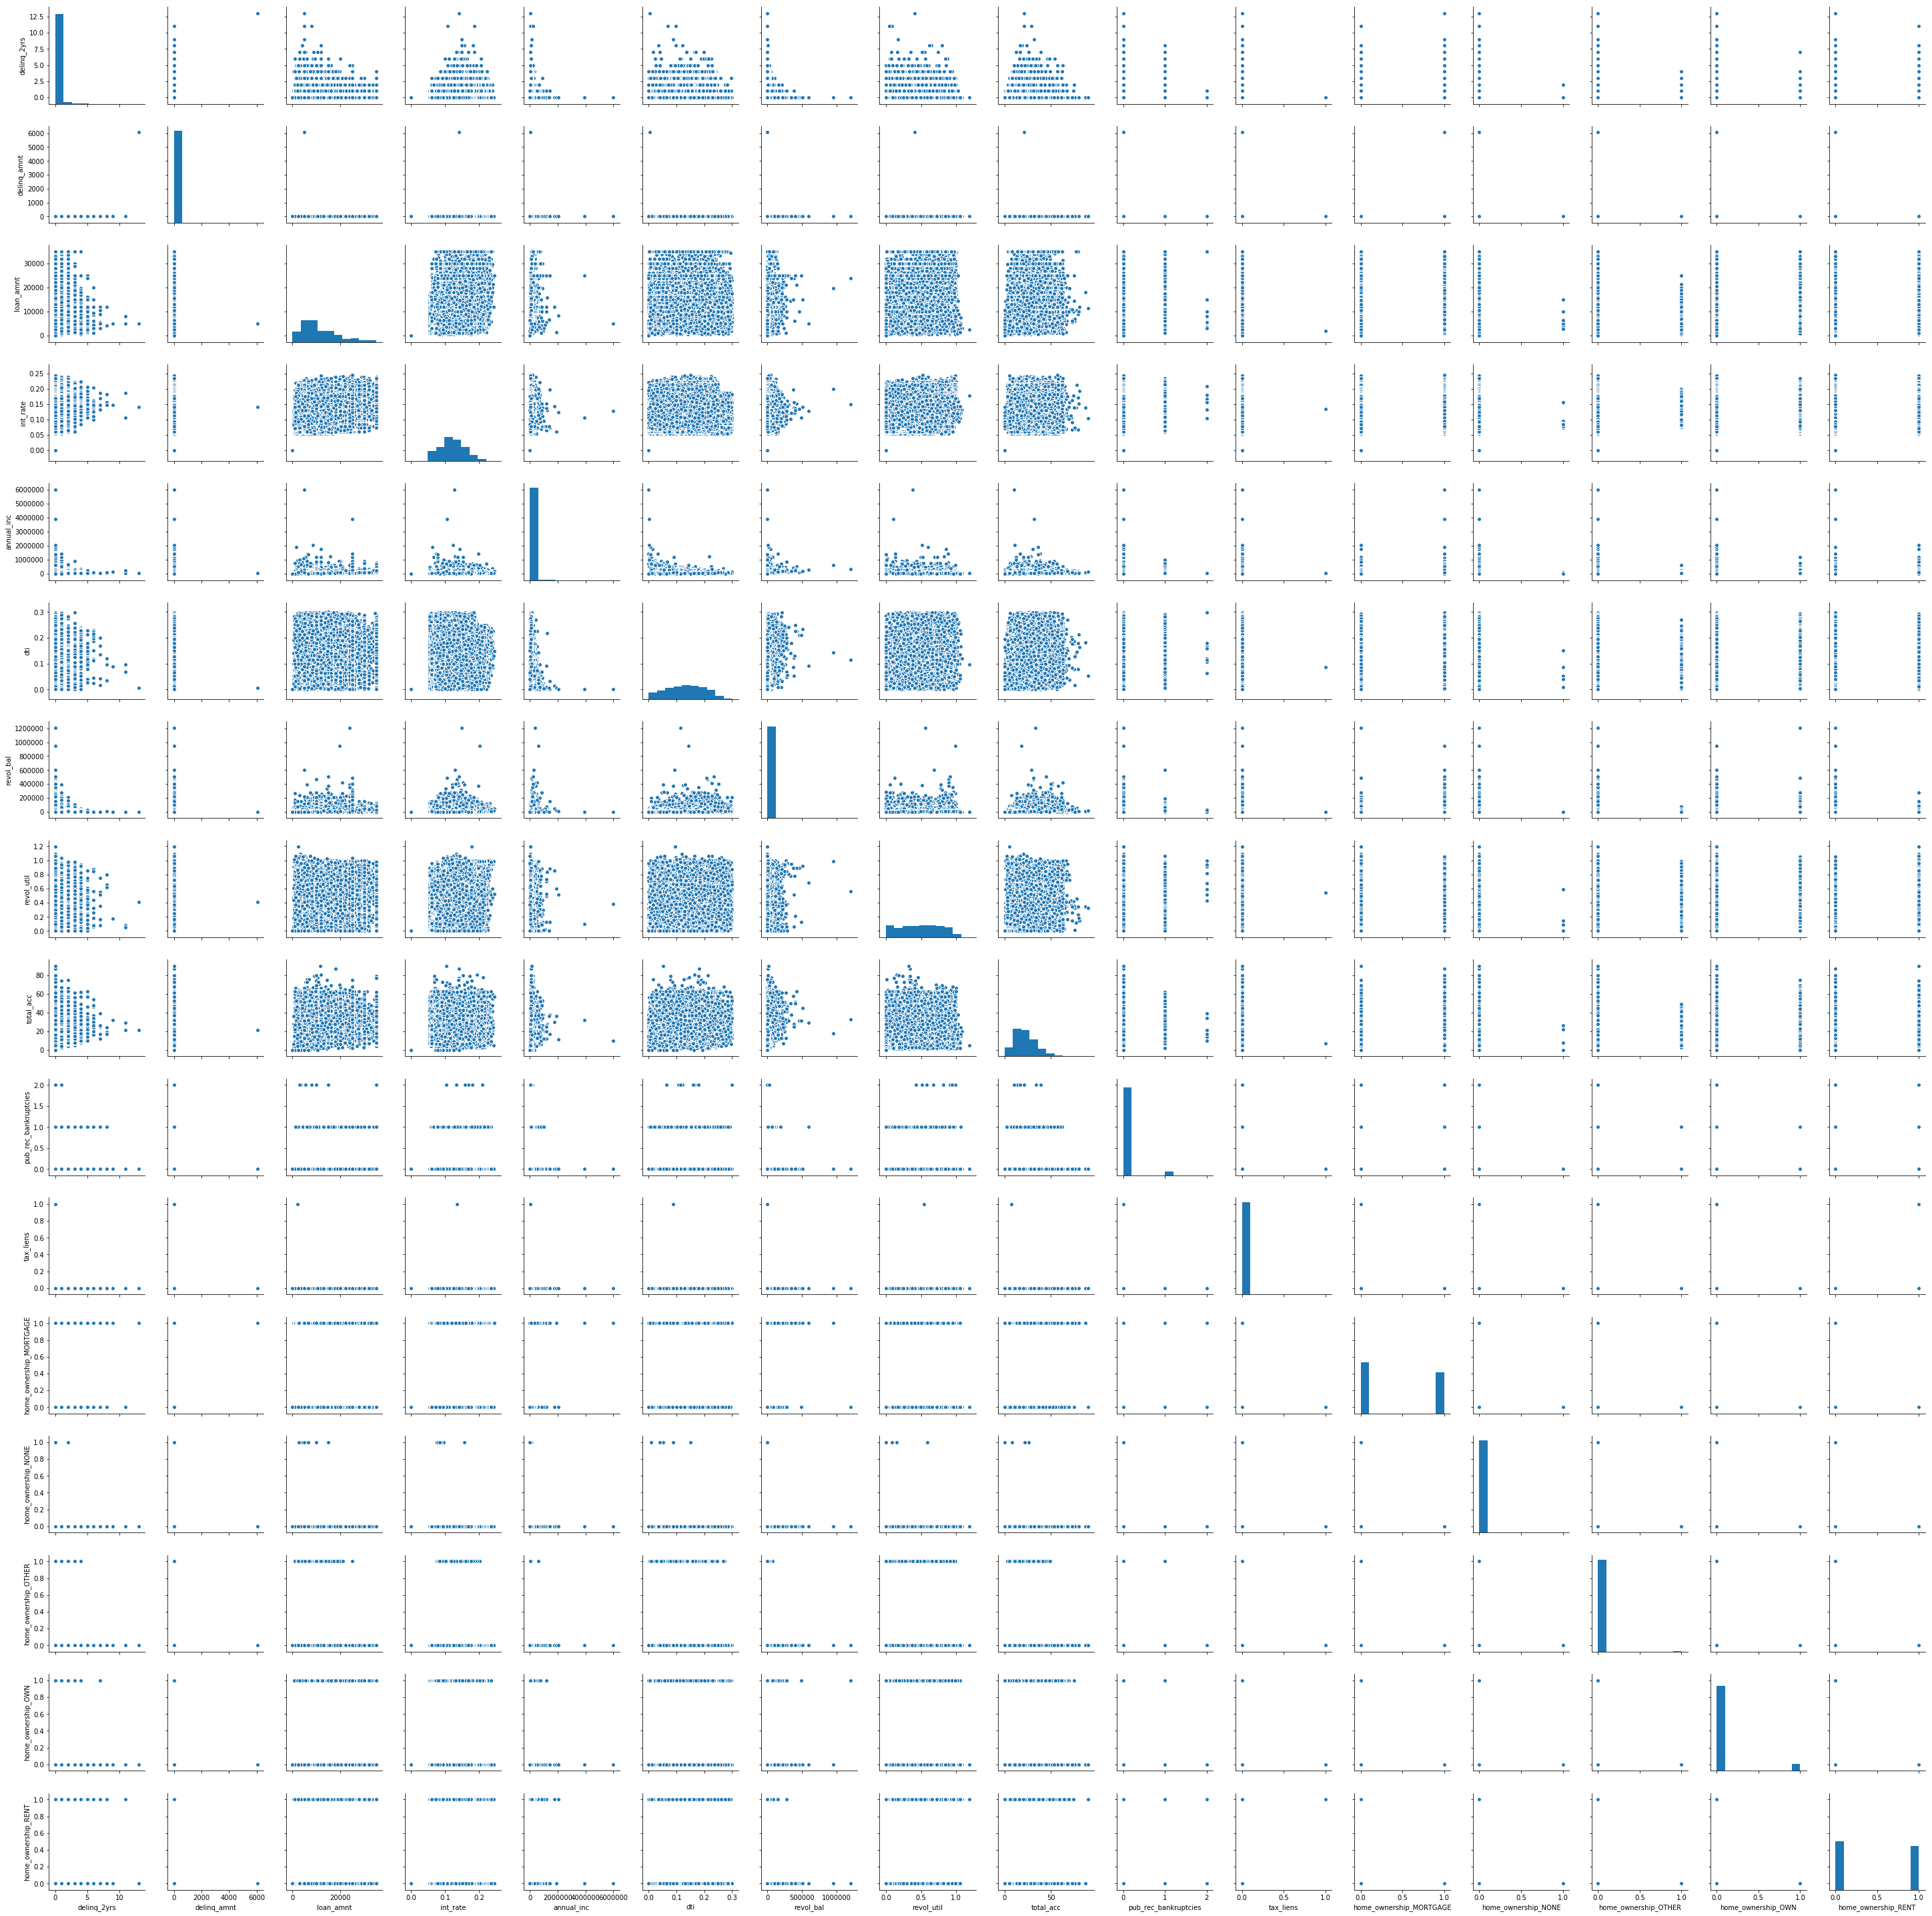

In [211]:
sns.pairplot(df_old_hodum[pair_ftrs])